In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [213]:
xtrain = pd.read_csv('Training Data/Logistic_X_Train.csv')

In [214]:
xtrain.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [215]:
xtrain=xtrain.values

In [216]:
ytrain = pd.read_csv('Training Data/Logistic_Y_Train.csv')

In [217]:
ytrain.head()

,label
0,1
1,1
2,1
3,0
4,0


In [218]:
ytrain = ytrain.values

In [219]:
print(xtrain.shape)
print(ytrain.shape)

(3000, 3)
(3000, 1)


In [220]:
# Normalising Data

In [221]:
u = np.mean(xtrain,axis=0)
std = np.std(xtrain,axis=0)
xtrain = (xtrain-u)/std

In [222]:
print(xtrain[:5,:])  # Normalised data

[[-0.93471307 -0.24439694 -0.46140414]
 [-0.7823013  -0.19327286 -1.08586573]
 [-0.46707053  0.56681072 -1.17534766]
 [ 0.99595846  0.34128188  1.16101187]
 [ 0.48839071  0.29377517  0.44826784]]


In [223]:
print(xtrain[:5,:])

[[-0.93471307 -0.24439694 -0.46140414]
 [-0.7823013  -0.19327286 -1.08586573]
 [-0.46707053  0.56681072 -1.17534766]
 [ 0.99595846  0.34128188  1.16101187]
 [ 0.48839071  0.29377517  0.44826784]]


In [224]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(x,theta):
    h =  np.dot(x,theta)
    return sigmoid(h)


def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += ( Y[i]*np.log2(y_) + (1-Y[i])*np.log2(1-y_) )
        
    return total_error/m  # Average error


def gradient(X,Y,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i]-y_)*x

    return grad/m


def gradientDescent(X,Y,learning_rate=0.5,max_iters=500):
    
    theta = np.zeros((X.shape[1],1))
    error_list = []
    
    for i in range(max_iters):
        grad = gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return error_list,theta  

In [225]:
error_list,theta = gradientDescent(xtrain,ytrain)

In [226]:
print(xtrain.shape)

(3000, 3)


In [227]:
print(theta)

[[-3.85337646]
 [ 2.65185236]
 [-2.9879465 ]]


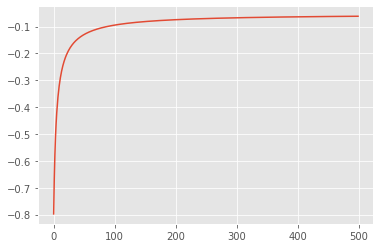

In [228]:
plt.plot(error_list)

In [229]:
xtest = pd.read_csv('Test Cases/Logistic_X_Test.csv')

In [230]:
xtest.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [231]:
xtest=xtest.values

In [232]:
def predict(xtest,theta):
    
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [233]:
Y_pred = np.array( [ predict(xtest[i],theta) for i in range(xtest.shape[0]) ] )

In [234]:
print(Y_pred.shape)

(1000,)


In [235]:
df = pd.DataFrame(Y_pred,columns=["label"])
df.to_csv('test_predictions.csv',index=False)

In [236]:
print(xtest.shape)

(1000, 3)
